Objective: Understand the application of Linear regression in real world scenarios and implement the classification techniques taught as part of the module DSC 7402, to solve the near real time use case from telecommunications domain.
Brief Learning Outcomes: 
• Be able to understand and explore Data 
• Be able to prepare and pre-process the data for modelling 
• Be able to implement basic regression model(s), analyze it and interpret the output 
• Be able to choose an evaluation metric for the problem at hand 
• Be able to improve the improve model performance by removing multi-collinearity 
• Using significant variables 
• Imposing regularization techniques 
• Be able to choose the final best models of all the models.

Project - Domain: Retail
Background: The customer from the gaming industry keen on understanding the customers better. 
As part of the exercise, he would like to know revenue potential from each of the customers. 

Problem statement: Give the customer information, predict the revenue potential.

Tasks- Perform the following activities:
1. Reading & Data Pre-processing
a. Read the data 
b. Explore and understand the data 
c. Check and handle missing values if any 
d. Perform type-conversion for required columns
2. Split the data into train and validation sets 
3. Model Building 
Model1 - Basic: 
Build Basic model on all attributes, analyze model performance 
Interpret the model output
Significance of overall model 
Interpret coefficients for any of the numerical and categorical attributes 
Choose the appropriate evaluation metric.
4. Steps to improve Model performance –
(a) Build additional models:
Model 2- Check for multicollinearity using VIF, and build the model after removing multi-collinear attributes; analyze model performance.
Model 3- Model with significant attributes given by Model2; analyze model performance
Model 4- For the Model 2, compute performance with probability threshold decided based on ROC curve; analyze model performance
Model 5- Model 2 with regularization imposed; analyze model performance
Create a table with model coefficients from each of the models. Write your observations
Build Lasso, Ridge and Elastic Net models and compare the model performance
(b) Tabulate the train and validation results for all the above models
(c) Analyze model performances and finalize the model
4


## Loading the required modules 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import sklearn
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Defining Functions for error metrics, mean absolute percentage error and coefficients

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#defining MAPE

In [ ]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test','R^2'])


#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = mean_absolute_percentage_error(test_act,test_pred)
    R2=metrics.r2_score(train_act,train_pred)
    s1=pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2],
                                           index=scores.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)

In [ ]:
def coeff(model_title,modelparams):
    tempdf=pd.DataFrame(modelparams)
    tempdf.rename(columns = {0:model_title},inplace = True)
    DF=pd.concat([coefficients,tempdf],axis=1)
    return(DF) 

In [ ]:
#definition of residual plots function
from scipy import stats
def residual_plots(results):
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    from statsmodels.nonparametric.smoothers_lowess import lowess
    from scipy import stats
    import statsmodels.api as sm
    
    
    fig, ax = plt.subplots(2,2,figsize=(14,10))
    
    ########## Residuals vs fitted - linearity of Errors ##########
    residuals = results.resid
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (8,7)
    
    ax[0,0].scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    ax[0,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[0,0].set_ylabel('Residuals')
    ax[0,0].set_xlabel('Fitted Values')
    ax[0,0].set_title('Residuals vs. Fitted')
    ax[0,0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax[0,0].annotate(i,xy=(fitted[i],residuals[i]))

    #plt.show()
    
    
    ######### qq plot - Normality of Errors ###########
    sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = results.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    #fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax[0,1].scatter(x,y, edgecolor = 'k',facecolor = 'none')
    ax[0,1].set_title('Normal Q-Q')
    ax[0,1].set_ylabel('Standardized Residuals')
    ax[0,1].set_xlabel('Theoretical Quantiles')
    ax[0,1].plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax[0,1].annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
    #plt.show()
    
    
    ######### Homoscedasticity - Errors Constant Variance ############
    student_residuals = results.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = results.resid.index
    smoothed = lowess(sqrt_student_residuals,fitted)
    top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

    #fig, ax = plt.subplots()
    ax[1,0].scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
    ax[1,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,0].set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax[1,0].set_xlabel('Fitted Values')
    ax[1,0].set_title('Scale-Location')
    ax[1,0].set_ylim(0,max(sqrt_student_residuals)+0.1)
    for i in top3.index:
        ax[1,0].annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
    #plt.show()
    
    
    ######### Cooks distance  - Influential Points ###########
    student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    student_residuals.index = results.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = results.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    top3 = sorted_student_residuals[:3]

    #fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01  
    ax[1,1].scatter(x, y, edgecolors = 'k', facecolors = 'none')
    ax[1,1].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,1].set_ylabel('Studentized Residuals')
    ax[1,1].set_xlabel('Leverage')
    ax[1,1].set_title('Residuals vs. Leverage')
    ax[1,1].set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    ax[1,1].set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax[1,1].annotate(val,xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(results.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax[1,1].plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax[1,1].plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax[1,1].plot([0,0],ax[1,1].get_ylim(), ls=":", alpha = .3, color = 'k')
    ax[1,1].plot(ax[1,1].get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
    ax[1,1].annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    ax[1,1].annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax[1,1].legend()
    plt.show()

## Importing the data

In [ ]:
gaming = pd.read_csv("CustomerData.csv")


In [ ]:
gaming.shape

(3209, 14)

In [ ]:
gaming.head()

CustomerID  City  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  \
0        1001     1             2              3              8     210   
1        1002     1             2              3              6     442   
2        1003     1             4              3              5     424   
3        1004     1             1              6              6     261   
4        1005     1             3              6              9     422   

   FrquncyOfPurchase  NoOfUnitsPurchased  FrequencyOFPlay  NoOfGamesPlayed  \
0                 11                  11             2344              108   
1                 20                  20              245               22   
2                 18                  18             1059              130   
3                 11                   9              365               34   
4                 44                  31             1066              102   

   NoOfGamesBought FavoriteChannelOfTransaction FavoriteGame  \
0               10                      Uniform      Uniform   
1                7                     Favorite      Uniform   
2               18                     Favorite      Uniform   
3               11                     Favorite      Uniform   
4               44                      Uniform      Uniform   

   TotalRevenueGenerated  
0                 107.51  
1                 382.40  
2                 135.01  
3                 125.00  
4                 335.05

In [ ]:
gaming.describe()

CustomerID         City  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  \
count  3209.000000  3209.000000   3209.000000    3209.000000    3209.000000   
mean   2605.000000     1.114054      2.128389       4.960735       7.990651   
std     926.502833     0.317927      1.035092       3.714191       8.784084   
min    1001.000000     1.000000      1.000000       0.000000       3.000000   
25%    1803.000000     1.000000      1.000000       4.000000       6.000000   
50%    2605.000000     1.000000      2.000000       5.000000       7.000000   
75%    3407.000000     1.000000      3.000000       6.000000       8.000000   
max    4209.000000     2.000000     11.000000     113.000000     113.000000   

            Tenure  FrquncyOfPurchase  NoOfUnitsPurchased  FrequencyOFPlay  \
count  3209.000000        3209.000000         3209.000000      3209.000000   
mean    347.520411          16.269554           14.684014      1568.207853   
std      90.520118           8.441670            7.182029      1810.630464   
min     100.000000           1.000000            1.000000         0.000000   
25%     301.000000          11.000000           10.000000       446.000000   
50%     368.000000          14.000000           13.000000      1029.000000   
75%     417.000000          19.000000           17.000000      2029.000000   
max     472.000000         119.000000          112.000000     27829.000000   

       NoOfGamesPlayed  NoOfGamesBought  TotalRevenueGenerated  
count      3209.000000      3209.000000            3209.000000  
mean         93.627921        14.761608             168.477183  
std          88.936372         8.773910              81.798528  
min           0.000000         0.000000             100.000000  
25%          37.000000        10.000000             116.640000  
50%          70.000000        14.000000             142.390000  
75%         119.000000        19.000000             191.250000  
max        1166.000000       115.000000             990.560000

In [ ]:
gaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    3209 non-null   int64  
 1   City                          3209 non-null   int64  
 2   NoOfChildren                  3209 non-null   int64  
 3   MinAgeOfChild                 3209 non-null   int64  
 4   MaxAgeOfChild                 3209 non-null   int64  
 5   Tenure                        3209 non-null   int64  
 6   FrquncyOfPurchase             3209 non-null   int64  
 7   NoOfUnitsPurchased            3209 non-null   int64  
 8   FrequencyOFPlay               3209 non-null   int64  
 9   NoOfGamesPlayed               3209 non-null   int64  
 10  NoOfGamesBought               3209 non-null   int64  
 11  FavoriteChannelOfTransaction  3209 non-null   object 
 12  FavoriteGame                  3209 non-null   object 
 13  Tot

In [ ]:
gaming.dropna()

CustomerID  City  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  \
0           1001     1             2              3              8     210   
1           1002     1             2              3              6     442   
2           1003     1             4              3              5     424   
3           1004     1             1              6              6     261   
4           1005     1             3              6              9     422   
...          ...   ...           ...            ...            ...     ...   
3204        4205     1             2              4              6     365   
3205        4206     1             2              2              5     348   
3206        4207     1             2              5              7     341   
3207        4208     1             2              6              7     368   
3208        4209     1             3              2              6     389   

      FrquncyOfPurchase  NoOfUnitsPurchased  FrequencyOFPlay  NoOfGamesPlayed  \
0                    11                  11             2344              108   
1                    20                  20              245               22   
2                    18                  18             1059              130   
3                    11                   9              365               34   
4                    44                  31             1066              102   
...                 ...                 ...              ...              ...   
3204                 16                  16              827               78   
3205                 20                  20             2933              294   
3206                 16                  13             1250              126   
3207                 18                  14             1364              122   
3208                 25                  17              475              111   

      NoOfGamesBought FavoriteChannelOfTransaction FavoriteGame  \
0                  10                      Uniform      Uniform   
1                   7                     Favorite      Uniform   
2                  18                     Favorite      Uniform   
3                  11                     Favorite      Uniform   
4                  44                      Uniform      Uniform   
...               ...                          ...          ...   
3204               16                     Favorite      Uniform   
3205               13                     Favorite      Uniform   
3206               16                      Uniform      Uniform   
3207               18                     Favorite      Uniform   
3208               25                     Favorite      Uniform   

      TotalRevenueGenerated  
0                    107.51  
1                    382.40  
2                    135.01  
3                    125.00  
4                    335.05  
...                     ...  
3204                 132.50  
3205                 223.23  
3206                 120.00  
3207                 161.50  
3208                 137.50  

[3209 rows x 14 columns]

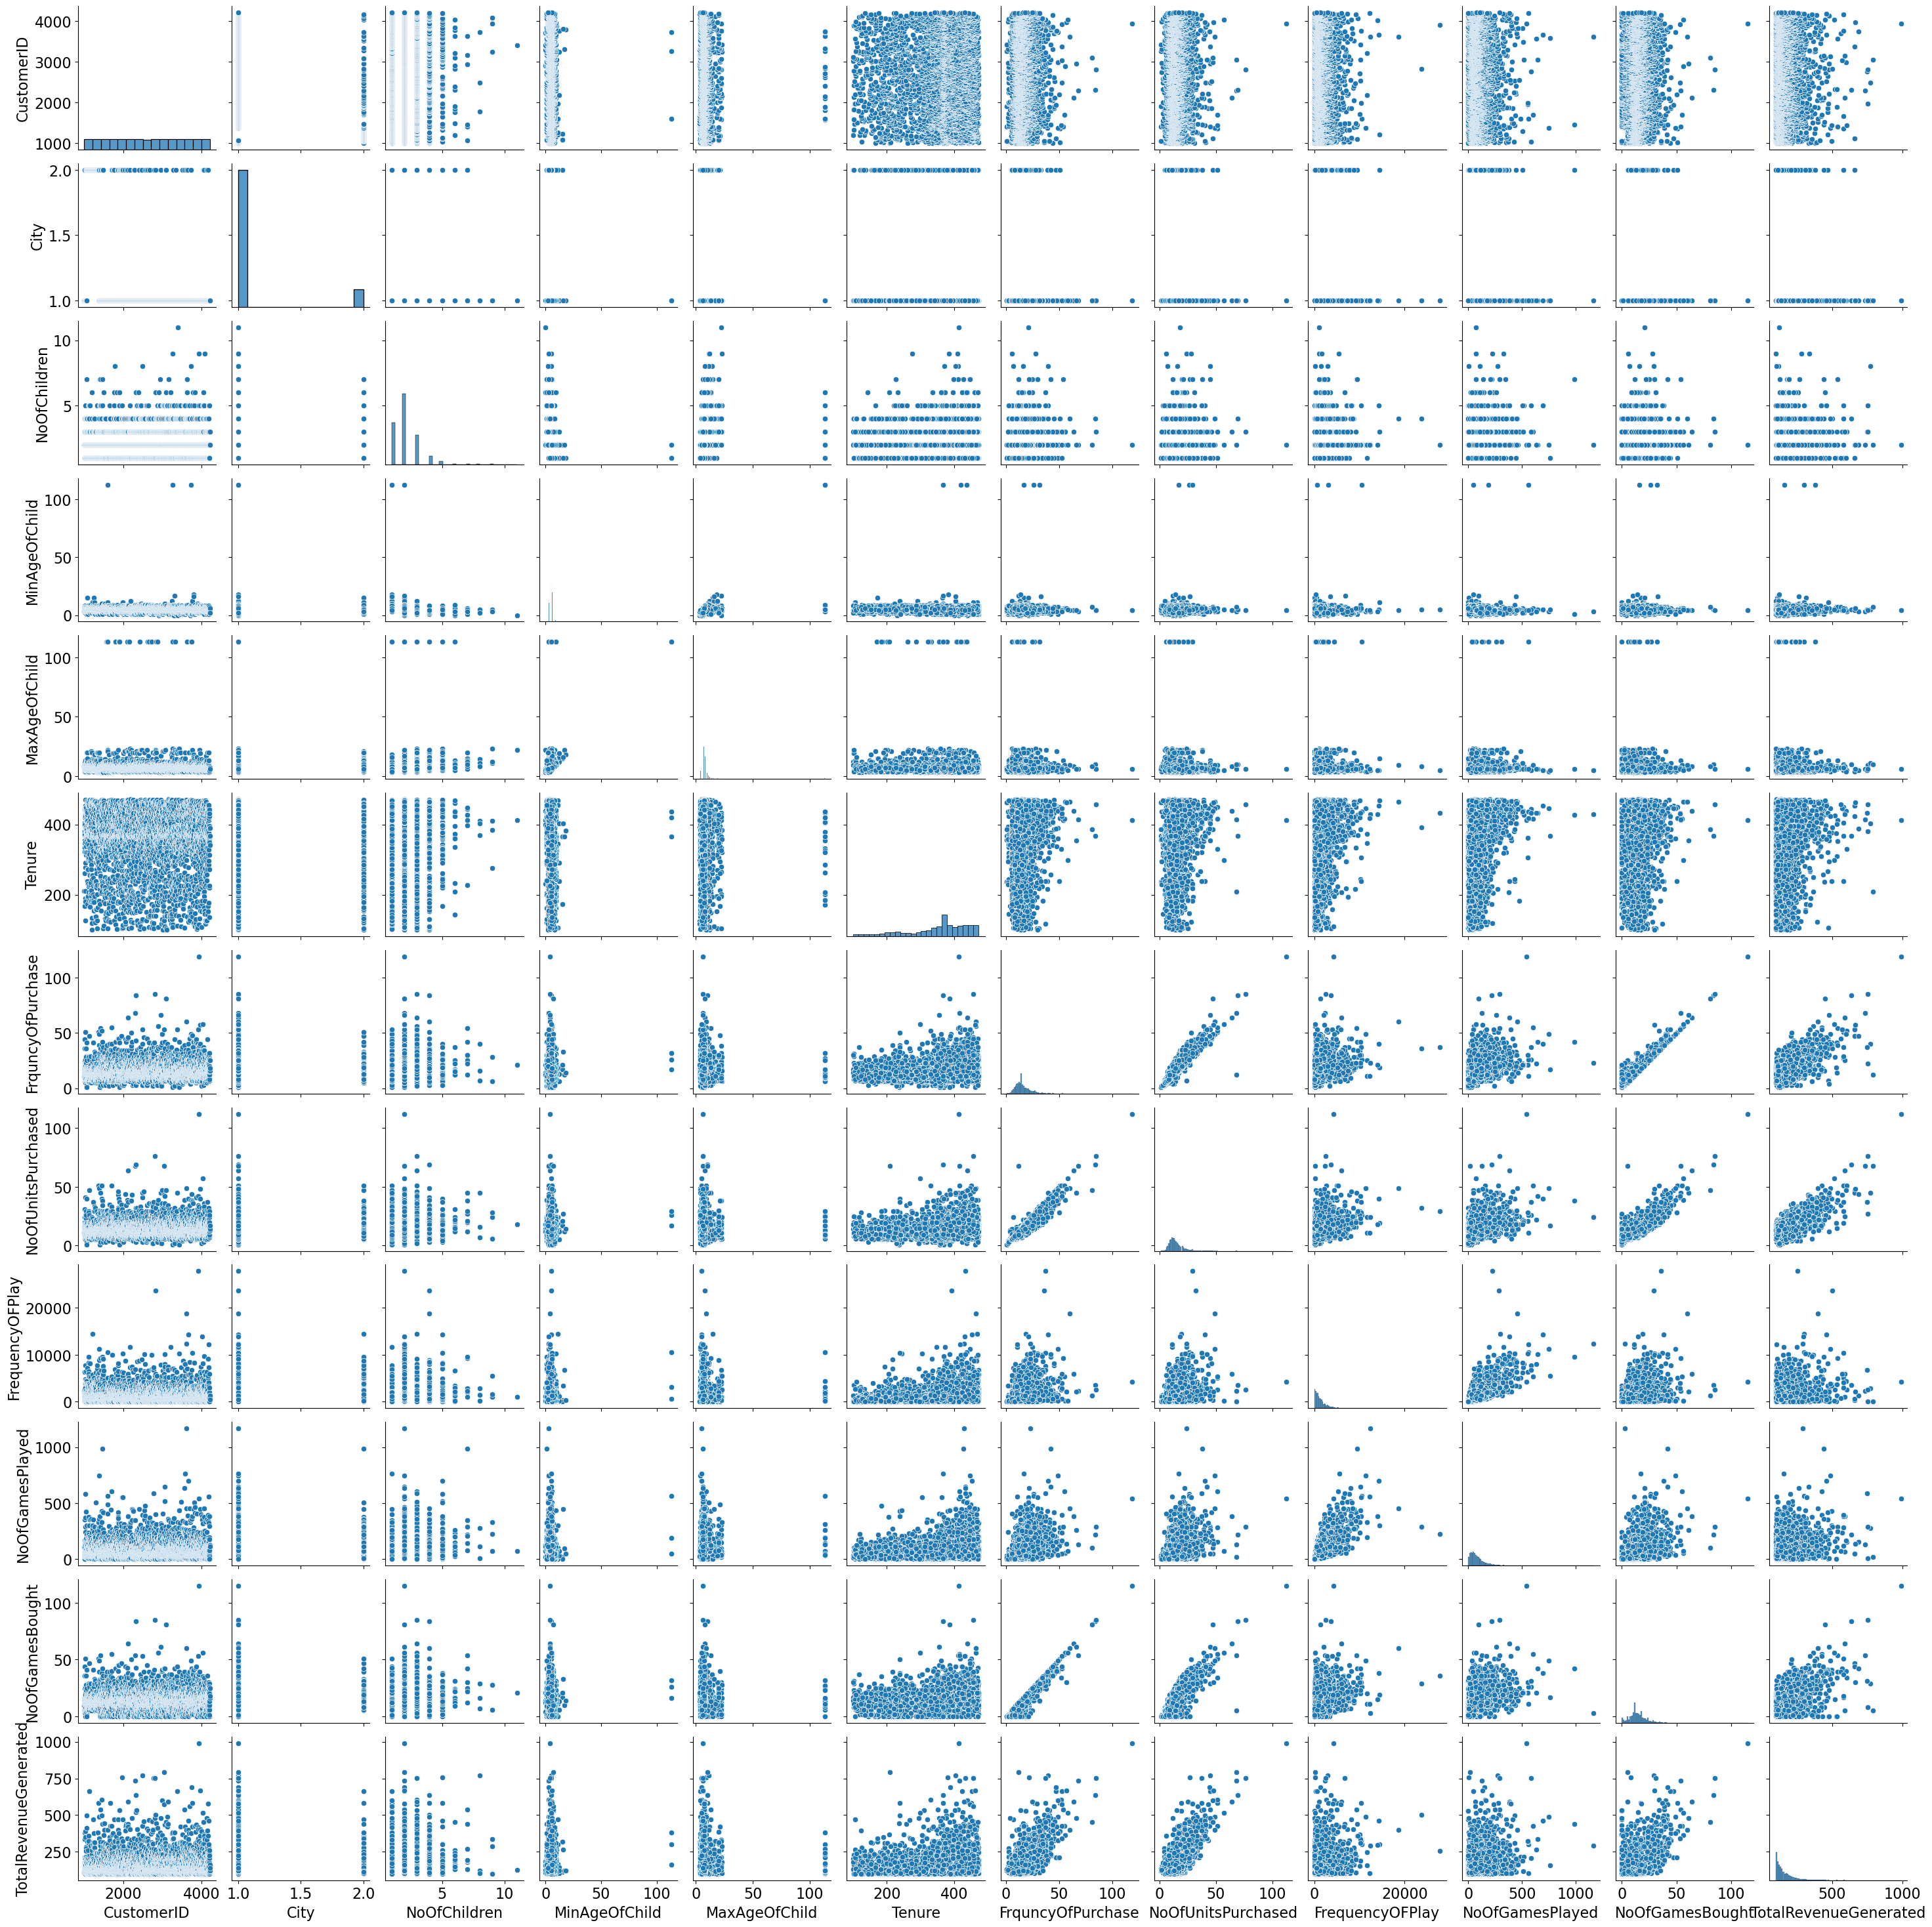

In [ ]:
import seaborn
seaborn.pairplot(gaming)

In [ ]:
fig = px.box(gaming, y="MinAgeOfChild")
fig.show()

In [ ]:
for col in ['City','FavoriteChannelOfTransaction','FavoriteGame']:
    gaming[col] = gaming[col].astype('category')
gaming.dtypes

CustomerID                         int64
City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

In [ ]:
gaming = gaming.drop(gaming[gaming['MaxAgeOfChild'] > 100].index) 
gaming = gaming.drop(gaming[gaming['MinAgeOfChild'] > 100].index)

In [ ]:
gaming_clean = gaming

In [ ]:
import plotly.express as px #importing plotly

In [ ]:
fig = px.scatter(gaming, x="FrequencyOFPlay", y="TotalRevenueGenerated",)
fig.show() 

In [ ]:
  fig = px.scatter(gaming, y="NoOfGamesBought", x="TotalRevenueGenerated",)
  fig.show() #plotting scatter plot with "Time on Website","Yearly Amount Spent"

In [ ]:
fig = px.bar(gaming, x= 'City', y= 'TotalRevenueGenerated', color= 'FavoriteGame')
fig.show()

# Data Preparation for model building 

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

gaming_clean = gaming
gaming_clean.head() #snapshot of clean data

In [ ]:
gaming_clean = gaming
gaming_clean.head() #snapshot of clean data

CustomerID City  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  \
0        1001    1             2              3              8     210   
1        1002    1             2              3              6     442   
2        1003    1             4              3              5     424   
3        1004    1             1              6              6     261   
4        1005    1             3              6              9     422   

   FrquncyOfPurchase  NoOfUnitsPurchased  FrequencyOFPlay  NoOfGamesPlayed  \
0                 11                  11             2344              108   
1                 20                  20              245               22   
2                 18                  18             1059              130   
3                 11                   9              365               34   
4                 44                  31             1066              102   

   NoOfGamesBought FavoriteChannelOfTransaction FavoriteGame  \
0               10                      Uniform      Uniform   
1                7                     Favorite      Uniform   
2               18                     Favorite      Uniform   
3               11                     Favorite      Uniform   
4               44                      Uniform      Uniform   

   TotalRevenueGenerated  
0                 107.51  
1                 382.40  
2                 135.01  
3                 125.00  
4                 335.05

In [ ]:
gaming_clean.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [ ]:
X = gaming_clean.drop(['CustomerID','TotalRevenueGenerated'],axis=1) 

In [ ]:
y = gaming_clean['TotalRevenueGenerated'] #dependent attributes

In [ ]:
import statsmodels.api as sm # import stats model o/p : R model
from sklearn.model_selection import train_test_split # importing neccessary modules

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121) #train test split

In [ ]:
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')

In [ ]:
#print(len(y_train))
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))

Y Target Size: 2551
X Train Size: 2551
X Test  Size: 638
Y Target Size: 638


In [ ]:
# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

const  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  \
2751    1.0             2              3              5     388   
260     1.0             1              5              5     457   
458     1.0             3              6              9     434   
2995    1.0             1              5              5     437   
2889    1.0             2              4              7     360   

      FrquncyOfPurchase  NoOfUnitsPurchased  FrequencyOFPlay  NoOfGamesPlayed  \
2751                 47                  44             1287              153   
260                  16                  16             2556               44   
458                  16                  15             5488              128   
2995                 12                  12             3955              189   
2889                  9                   9             1015               56   

      NoOfGamesBought  City_2  FavoriteChannelOfTransaction_Uniform  \
2751               42       0                                     1   
260                16       1                                     0   
458                16       0                                     0   
2995               12       0                                     0   
2889                2       0                                     0   

      FavoriteGame_Uniform  
2751                     1  
260                      1  
458                      1  
2995                     1  
2889                     1

In [ ]:
origG= gaming_clean

## MODEL 1 : Basic model with all columns

Now its time to train our model on our training data!



In [ ]:
model1 = sm.OLS(y_train, X_train).fit()
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.726
Model:                               OLS   Adj. R-squared:                  0.724
Method:                    Least Squares   F-statistic:                     559.3
Date:                   Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                           22:31:08   Log-Likelihood:                -13253.
No. Observations:                   2551   AIC:                         2.653e+04
Df Residuals:                       2538   BIC:                         2.661e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
#Get error metrics
scores = get_metrics(y_train,model1.predict(X_train),
                     y_test,model1.predict(X_test),
                     "Model 1",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train  MAPE_Train   MAE_Test  \
0  Model 1  31.775126  1904.950192   43.645735   19.091031  31.141938   

      MSE_Test  RMSE_Test  MAPE_Test       R^2  
0  1746.355475  41.789418   19.87997  0.725599

In [ ]:
coefficients=pd.DataFrame(model1.params)
coefficients.rename(columns = {0 :"M1: Model with all Columns"},inplace = True)
coefficients

M1: Model with all Columns
const                                                  22.222330
NoOfChildren                                            5.910939
MinAgeOfChild                                           4.239925
MaxAgeOfChild                                          -1.710272
Tenure                                                 -0.011760
FrquncyOfPurchase                                      11.151762
NoOfUnitsPurchased                                      9.132840
FrequencyOFPlay                                         0.002267
NoOfGamesPlayed                                        -0.023847
NoOfGamesBought                                       -11.947035
City_2                                                 11.092928
FavoriteChannelOfTransaction_Uniform                  -15.551181
FavoriteGame_Uniform                                   -8.358531

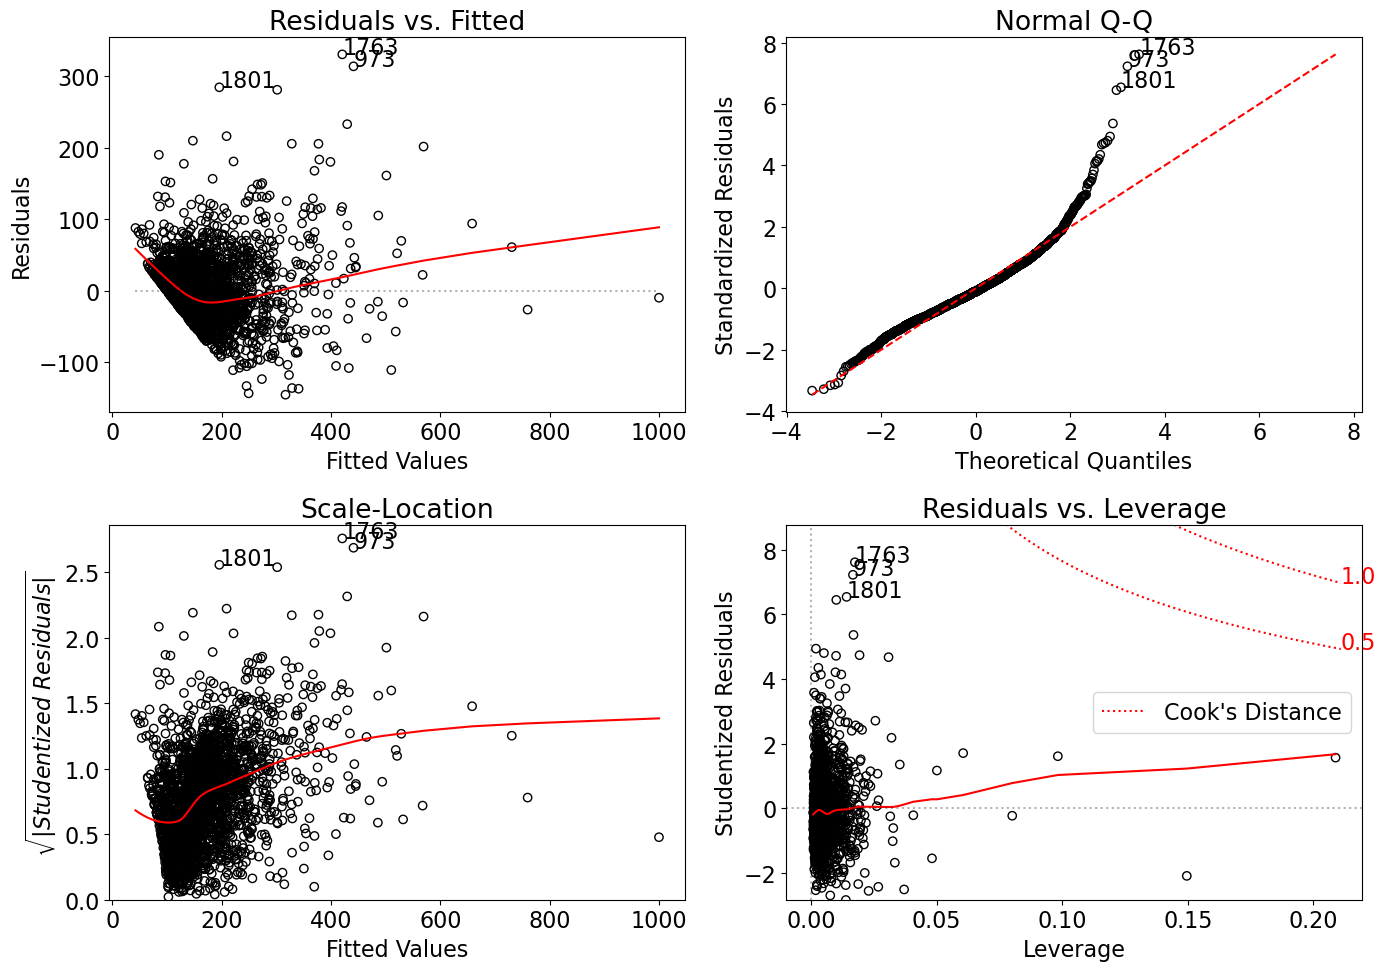

In [ ]:
residual_plots(model1) #get residual plots of model

## Model 2

In [ ]:
gaming1 = origG
gamingVIF=gaming1 #get snapshot of clean data

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
gamingVIF=pd.get_dummies(gaming,drop_first=True,dtype='int8')

In [ ]:
gamingVIF.head()

CustomerID  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  \
0        1001             2              3              8     210   
1        1002             2              3              6     442   
2        1003             4              3              5     424   
3        1004             1              6              6     261   
4        1005             3              6              9     422   

   FrquncyOfPurchase  NoOfUnitsPurchased  FrequencyOFPlay  NoOfGamesPlayed  \
0                 11                  11             2344              108   
1                 20                  20              245               22   
2                 18                  18             1059              130   
3                 11                   9              365               34   
4                 44                  31             1066              102   

   NoOfGamesBought  TotalRevenueGenerated  City_2  \
0               10                 107.51       0   
1                7                 382.40       0   
2               18                 135.01       0   
3               11                 125.00       0   
4               44                 335.05       0   

   FavoriteChannelOfTransaction_Uniform  FavoriteGame_Uniform  
0                                     1                     1  
1                                     0                     1  
2                                     0                     1  
3                                     0                     1  
4                                     1                     1

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = gamingVIF.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(gamingVIF.values, i)
                          for i in range(len(gamingVIF.columns))]
  
print(vif_data)

                                 Feature         VIF
0                             CustomerID    9.714934
1                           NoOfChildren    9.456204
2                          MinAgeOfChild   11.805914
3                          MaxAgeOfChild   13.624723
4                                 Tenure   14.032861
5                      FrquncyOfPurchase  122.089411
6                     NoOfUnitsPurchased   58.668611
7                        FrequencyOFPlay    3.906188
8                        NoOfGamesPlayed    5.319401
9                        NoOfGamesBought   61.442260
10                 TotalRevenueGenerated   18.683290
11                                City_2    1.463669
12  FavoriteChannelOfTransaction_Uniform    1.339524
13                  FavoriteGame_Uniform   18.775104


In [ ]:
vif_data.sort_values(by='VIF',ascending=False) #sort VIF data

Feature         VIF
5                      FrquncyOfPurchase  122.089411
9                        NoOfGamesBought   61.442260
6                     NoOfUnitsPurchased   58.668611
13                  FavoriteGame_Uniform   18.775104
10                 TotalRevenueGenerated   18.683290
4                                 Tenure   14.032861
3                          MaxAgeOfChild   13.624723
2                          MinAgeOfChild   11.805914
0                             CustomerID    9.714934
1                           NoOfChildren    9.456204
8                        NoOfGamesPlayed    5.319401
7                        FrequencyOFPlay    3.906188
11                                City_2    1.463669
12  FavoriteChannelOfTransaction_Uniform    1.339524

<AxesSubplot:>

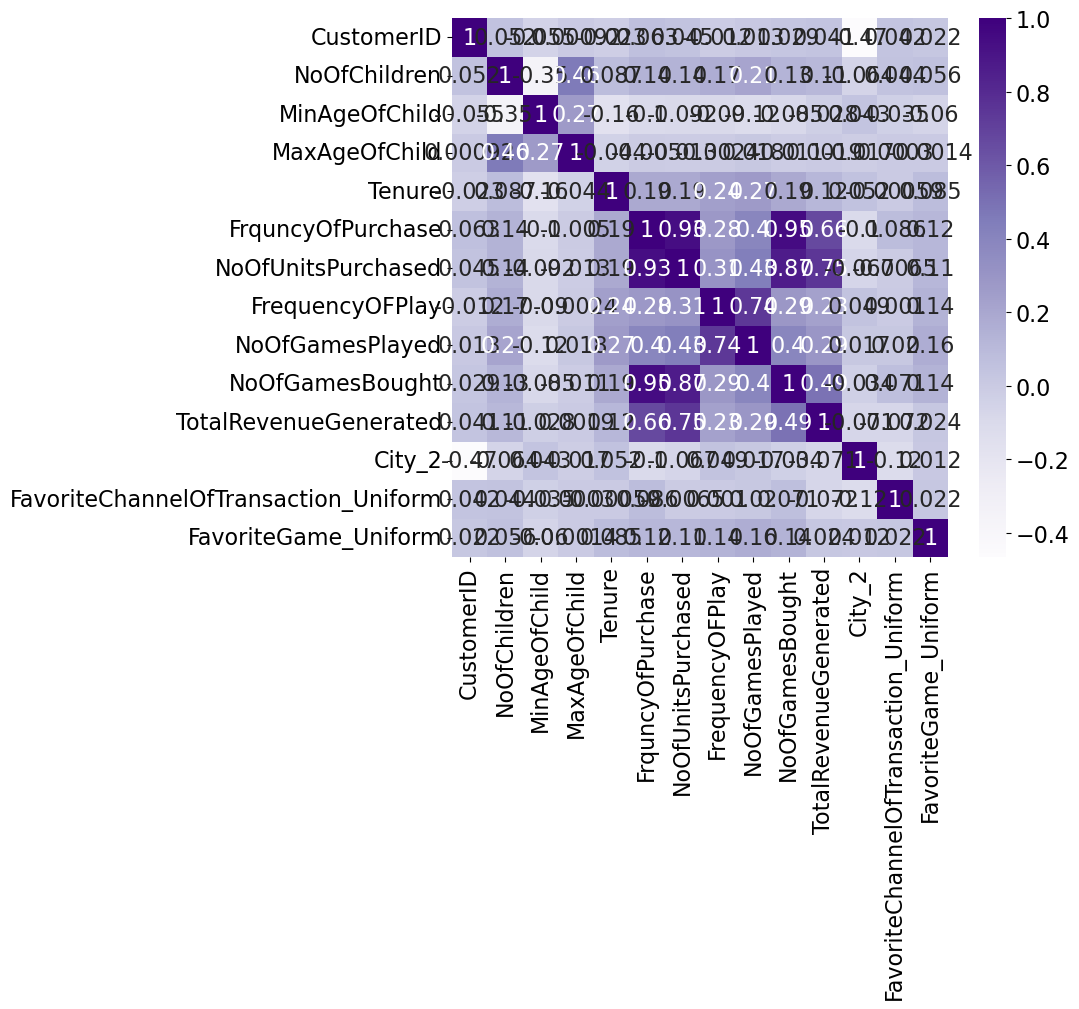

In [ ]:
sns.heatmap(gamingVIF.corr(),annot=True,cmap='Purples') #plot correlation plot

In [ ]:
gamingVIF= gamingVIF.drop(columns = ['FrquncyOfPurchase'],axis=1)

In [ ]:
#sns.heatmap(gamingVIF.corr(),annot=True,cmap='Purples') 
gamingVIF.columns

Index(['CustomerID', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'NoOfUnitsPurchased', 'FrequencyOFPlay', 'NoOfGamesPlayed',
       'NoOfGamesBought', 'TotalRevenueGenerated', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')

In [ ]:
vif_data2 = pd.DataFrame()
vif_data2["Feature"] = gamingVIF.columns
  
# calculating VIF for each feature
vif_data2["VIF"] = [variance_inflation_factor(gamingVIF.values, i)
                          for i in range(len(gamingVIF.columns))]
  
print(vif_data2)

                                 Feature        VIF
0                             CustomerID   9.703374
1                           NoOfChildren   9.405409
2                          MinAgeOfChild  11.647633
3                          MaxAgeOfChild  13.525214
4                                 Tenure  13.970619
5                     NoOfUnitsPurchased  48.879888
6                        FrequencyOFPlay   3.898465
7                        NoOfGamesPlayed   5.310168
8                        NoOfGamesBought  20.527843
9                  TotalRevenueGenerated  15.608336
10                                City_2   1.417812
11  FavoriteChannelOfTransaction_Uniform   1.264389
12                  FavoriteGame_Uniform  18.771861


In [ ]:
vif_data2.sort_values(by='VIF',ascending=False) #sort VIF data

Feature        VIF
5                     NoOfUnitsPurchased  48.879888
8                        NoOfGamesBought  20.527843
12                  FavoriteGame_Uniform  18.771861
9                  TotalRevenueGenerated  15.608336
4                                 Tenure  13.970619
3                          MaxAgeOfChild  13.525214
2                          MinAgeOfChild  11.647633
0                             CustomerID   9.703374
1                           NoOfChildren   9.405409
7                        NoOfGamesPlayed   5.310168
6                        FrequencyOFPlay   3.898465
10                                City_2   1.417812
11  FavoriteChannelOfTransaction_Uniform   1.264389

In [ ]:
gamingVIF.head()

CustomerID  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  \
0        1001             2              3              8     210   
1        1002             2              3              6     442   
2        1003             4              3              5     424   
3        1004             1              6              6     261   
4        1005             3              6              9     422   

   NoOfUnitsPurchased  FrequencyOFPlay  NoOfGamesPlayed  NoOfGamesBought  \
0                  11             2344              108               10   
1                  20              245               22                7   
2                  18             1059              130               18   
3                   9              365               34               11   
4                  31             1066              102               44   

   TotalRevenueGenerated  City_2  FavoriteChannelOfTransaction_Uniform  \
0                 107.51       0                                     1   
1                 382.40       0                                     0   
2                 135.01       0                                     0   
3                 125.00       0                                     0   
4                 335.05       0                                     1   

   FavoriteGame_Uniform  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

In [ ]:
X = gaming_clean.drop(['CustomerID','TotalRevenueGenerated','FrquncyOfPurchase'],axis=1)
y = gaming_clean['TotalRevenueGenerated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
scaler = StandardScaler()
num_vars = ['NoOfChildren','MinAgeOfChild', 'Tenure','MaxAgeOfChild','NoOfGamesBought', 'NoOfUnitsPurchased']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')
X_train= sm.add_constant(X_train)
X_test= sm.add_constant(X_test)
model2 = sm.OLS(y_train, X_train).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.667
Model:                               OLS   Adj. R-squared:                  0.665
Method:                    Least Squares   F-statistic:                     461.5
Date:                   Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                           22:31:15   Log-Likelihood:                -13501.
No. Observations:                   2551   AIC:                         2.703e+04
Df Residuals:                       2539   BIC:                         2.710e+04
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
#get coefficients 
coefficients=coeff("M2 : Multicollinearity Removed(VIF)",model2.params)
coefficients

M1: Model with all Columns  \
const                                                  22.222330   
NoOfChildren                                            5.910939   
MinAgeOfChild                                           4.239925   
MaxAgeOfChild                                          -1.710272   
Tenure                                                 -0.011760   
FrquncyOfPurchase                                      11.151762   
NoOfUnitsPurchased                                      9.132840   
FrequencyOFPlay                                         0.002267   
NoOfGamesPlayed                                        -0.023847   
NoOfGamesBought                                       -11.947035   
City_2                                                 11.092928   
FavoriteChannelOfTransaction_Uniform                  -15.551181   
FavoriteGame_Uniform                                   -8.358531   

                                      M2 : Multicollinearity Removed(VIF)  
const                                                          184.198794  
NoOfChildren                                                     4.866800  
MinAgeOfChild                                                    5.595750  
MaxAgeOfChild                                                   -2.907155  
Tenure                                                           0.177130  
FrquncyOfPurchase                                                     NaN  
NoOfUnitsPurchased                                             108.281020  
FrequencyOFPlay                                                  0.002132  
NoOfGamesPlayed                                                 -0.054170  
NoOfGamesBought                                                -52.209467  
City_2                                                          -2.228026  
FavoriteChannelOfTransaction_Uniform                            -4.918857  
FavoriteGame_Uniform                                           -12.244581

In [ ]:
# y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# y_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
#Get error metrics
scores = get_metrics(y_train,model2.predict(X_train),
                     y_test,model2.predict(X_test),
                     "Model 2",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train  MAPE_Train   MAE_Test  \
0  Model 1  31.775126  1904.950192   43.645735   19.091031  31.141938   
1  Model 2  34.728607  2314.360777   48.107804   20.742194  32.991409   

      MSE_Test  RMSE_Test  MAPE_Test       R^2  
0  1746.355475  41.789418  19.879970  0.725599  
1  1902.058327  43.612594  21.298412  0.666625

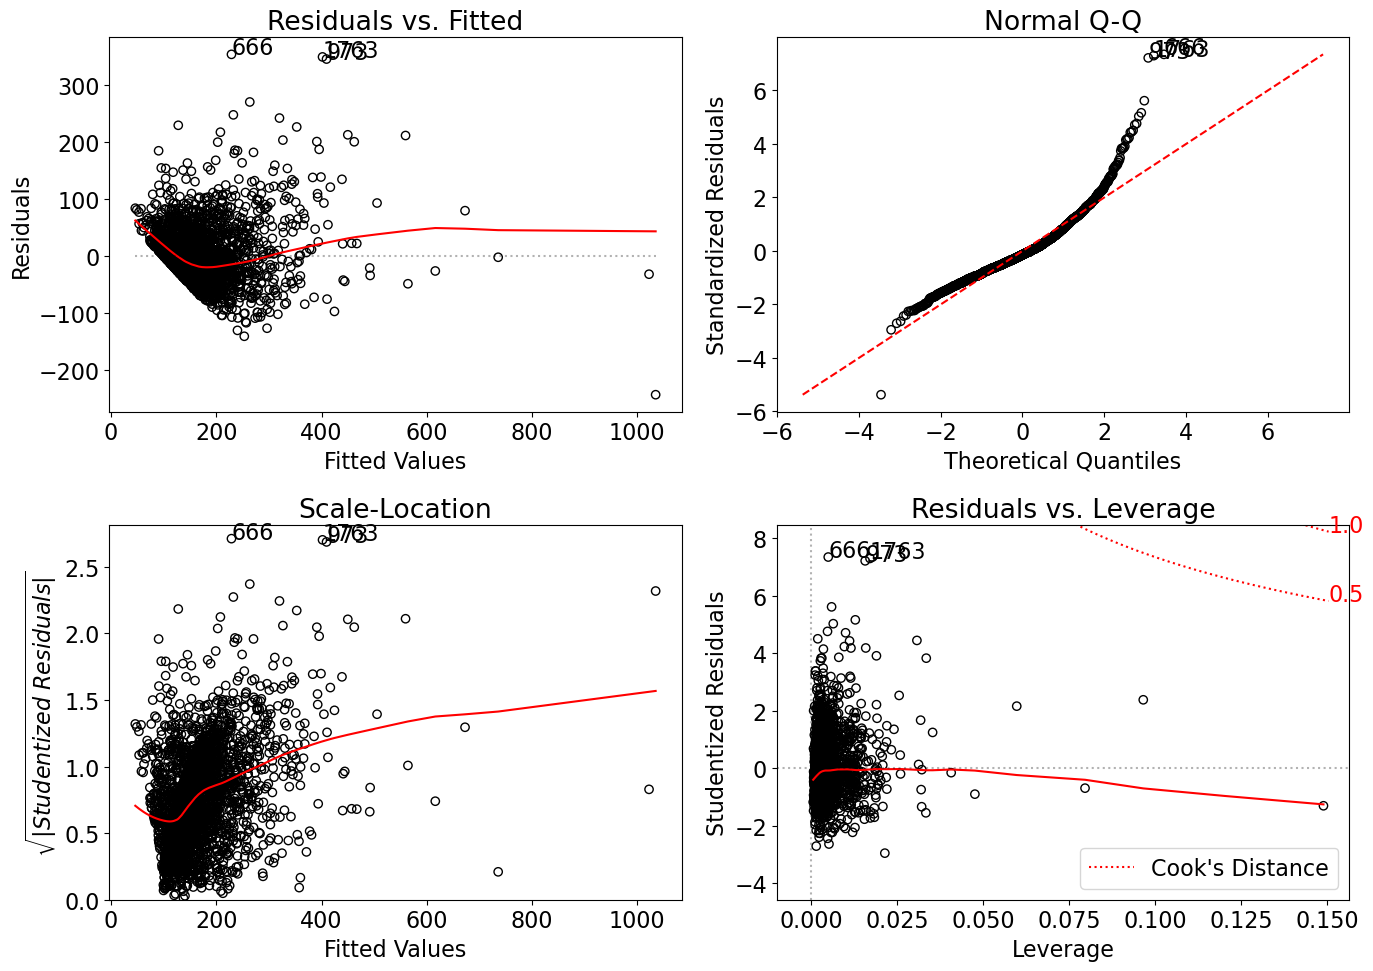

In [ ]:
residual_plots(model2)

## Model 3
Dropping insigificant variables acc to Model 2 

In [ ]:
gaming_clean = gaming

In [ ]:
X = gaming_clean.drop(['CustomerID','TotalRevenueGenerated','FrquncyOfPurchase','Tenure'],axis=1)
y = gaming_clean['TotalRevenueGenerated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
scaler = StandardScaler()
num_vars = ['NoOfChildren','MinAgeOfChild', 'MaxAgeOfChild','NoOfGamesBought', 'NoOfUnitsPurchased']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')
X_train= sm.add_constant(X_train)
X_test= sm.add_constant(X_test)
model3 = sm.OLS(y_train, X_train).fit()
print(model3.summary())

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.667
Model:                               OLS   Adj. R-squared:                  0.665
Method:                    Least Squares   F-statistic:                     507.9
Date:                   Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                           22:31:20   Log-Likelihood:                -13501.
No. Observations:                   2551   AIC:                         2.702e+04
Df Residuals:                       2540   BIC:                         2.709e+04
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
#get coefficients 
coefficients=coeff("M3 : Removing Non significant variables",model3.params)
coefficients

M1: Model with all Columns  \
const                                                  22.222330   
NoOfChildren                                            5.910939   
MinAgeOfChild                                           4.239925   
MaxAgeOfChild                                          -1.710272   
Tenure                                                 -0.011760   
FrquncyOfPurchase                                      11.151762   
NoOfUnitsPurchased                                      9.132840   
FrequencyOFPlay                                         0.002267   
NoOfGamesPlayed                                        -0.023847   
NoOfGamesBought                                       -11.947035   
City_2                                                 11.092928   
FavoriteChannelOfTransaction_Uniform                  -15.551181   
FavoriteGame_Uniform                                   -8.358531   

                                      M2 : Multicollinearity Removed(VIF)  \
const                                                          184.198794   
NoOfChildren                                                     4.866800   
MinAgeOfChild                                                    5.595750   
MaxAgeOfChild                                                   -2.907155   
Tenure                                                           0.177130   
FrquncyOfPurchase                                                     NaN   
NoOfUnitsPurchased                                             108.281020   
FrequencyOFPlay                                                  0.002132   
NoOfGamesPlayed                                                 -0.054170   
NoOfGamesBought                                                -52.209467   
City_2                                                          -2.228026   
FavoriteChannelOfTransaction_Uniform                            -4.918857   
FavoriteGame_Uniform                                           -12.244581   

                                      M3 : Removing Non significant variables  
const                                                              184.135273  
NoOfChildren                                                         4.861214  
MinAgeOfChild                                                        5.567378  
MaxAgeOfChild                                                       -2.904415  
Tenure                                                                    NaN  
FrquncyOfPurchase                                                         NaN  
NoOfUnitsPurchased                                                 108.294279  
FrequencyOFPlay                                                      0.002141  
NoOfGamesPlayed                                                     -0.053887  
NoOfGamesBought                                                    -52.206205  
City_2                                                              -2.201800  
FavoriteChannelOfTransaction_Uniform                                -4.923226  
FavoriteGame_Uniform                                               -12.222597

In [ ]:
scores = get_metrics(y_train,model3.predict(X_train),
                     y_test,model3.predict(X_test),
                     "Model 3",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train  MAPE_Train   MAE_Test  \
0  Model 1  31.775126  1904.950192   43.645735   19.091031  31.141938   
1  Model 2  34.728607  2314.360777   48.107804   20.742194  32.991409   
2  Model 3  34.725513  2314.388821   48.108095   20.739578  32.981389   

      MSE_Test  RMSE_Test  MAPE_Test       R^2  
0  1746.355475  41.789418  19.879970  0.725599  
1  1902.058327  43.612594  21.298412  0.666625  
2  1900.945871  43.599838  21.293906  0.666621

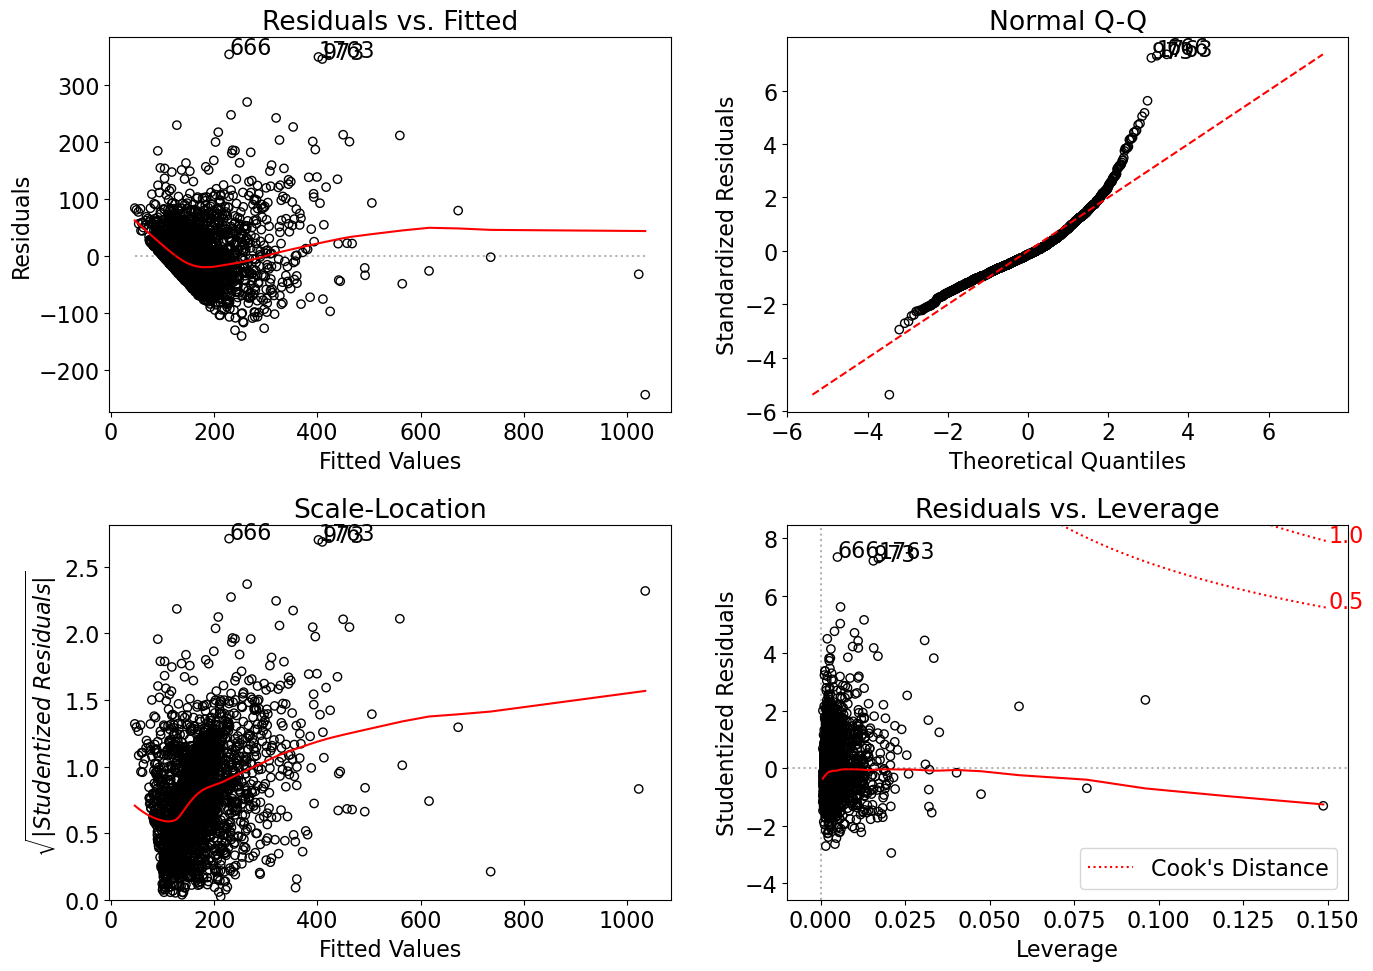

In [ ]:
residual_plots(model3) 

In [ ]:
### Influence points removal

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [ ]:
influence_points = OLSInfluence(model3) # results is output from the lm model built earlier

pd.DataFrame(influence_points.influence).describe()

0
count  2551.000000
mean      0.011239
std       0.837651
min     -32.883337
25%      -0.076961
50%      -0.015633
75%       0.061276
max      11.598687

In [ ]:
pd.DataFrame(influence_points.influence)

0
437  -0.006614
2630  0.025976
581   0.139316
3206 -0.027220
1571  0.006669
...        ...
339  -0.033497
1728 -0.097952
2128 -0.014482
1641 -0.030365
469  -0.536324

[2551 rows x 1 columns]

In [ ]:
gc = gaming_clean
influence_data = pd.DataFrame(influence_points.influence[influence_points.influence>=1])
gc['influence_value']= influence_points.influence
gc.loc[influence_data.index,].sort_values(['influence_value'], ascending = False).head(10)


CustomerID City  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  \
1822        2823    1             4              5              8     392   
1488        2489    1             8              5             11     403   
462         1463    2             7              1              6     428   
2091        3092    1             2              7              8     386   
1763        2764    1             3              5              5     433   
973         1974    1             5              5              9     381   
2758        3759    1             5              6              7     238   
1801        2802    1             3              4              7     294   
124         1125    2             2              4              6     453   
412         1413    1             7              6             13     412   

      FrquncyOfPurchase  NoOfUnitsPurchased  FrequencyOFPlay  NoOfGamesPlayed  \
1822                 36                  32            23746              287   
1488                 40                  45             2916              276   
462                  42                  38             9538              986   
2091                 81                  47             1294               99   
1763                 37                  37             6743              586   
973                  22                  27              122                7   
2758                 37                  37            10404              382   
1801                  4                  12               43                6   
124                  47                  47              346               49   
412                  54                  45             9357              290   

      NoOfGamesBought FavoriteChannelOfTransaction FavoriteGame  \
1822               29                     Favorite      Uniform   
1488               29                     Favorite      Uniform   
462                42                     Favorite      Uniform   
2091               81                     Favorite      Uniform   
1763               31                     Favorite      Uniform   
973                 8                     Favorite      Uniform   
2758               37                     Favorite      Uniform   
1801                0                     Favorite     Favorite   
124                47                     Favorite      Uniform   
412                54                      Uniform      Uniform   

      TotalRevenueGenerated  influence_value  
1822                 501.72        11.598687  
1488                 770.95         6.703797  
462                  439.57         6.291690  
2091                 452.50         6.291373  
1763                 750.96         6.065097  
973                  754.81         5.462654  
2758                 582.50         3.215558  
1801                 479.97         3.215220  
124                  662.48         3.192846  
412                  537.53         3.170553

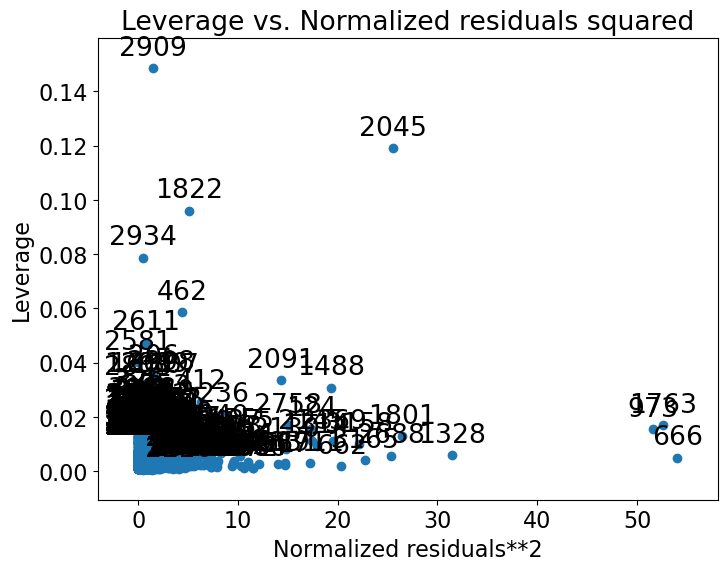

In [ ]:
# leverage vs residual plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(model3, ax=ax)

In [ ]:
gc.loc[[973,2045,1488,2909,2045,1822]]
gaming2 =  gc

In [ ]:
gaming2 = gaming2.drop([973,2045,1488,2909,2045,1822])
y = y.drop([973,2045,1488,2909,2045,1822])

In [ ]:
fig_without_outliers = px.scatter(gaming2, x="FrquncyOfPurchase", y="TotalRevenueGenerated",trendline="ols")
fig_without_outliers.show() #plot sactter plot between "Length of Membership","Yearly Amount Spent"

In [ ]:
gaming2 = gaming2.drop('influence_value', axis =1)


In [ ]:
X = gaming2.drop(['CustomerID','TotalRevenueGenerated','Tenure','FrquncyOfPurchase'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
scaler = StandardScaler()
num_vars = ['NoOfChildren','MinAgeOfChild', 'MaxAgeOfChild','NoOfGamesBought', 'NoOfUnitsPurchased']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')
X_train= sm.add_constant(X_train)
X_test= sm.add_constant(X_test)
model2_5 = sm.OLS(y_train, X_train).fit()
print(model2_5.summary())

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.660
Model:                               OLS   Adj. R-squared:                  0.658
Method:                    Least Squares   F-statistic:                     491.7
Date:                   Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                           22:31:28   Log-Likelihood:                -13416.
No. Observations:                   2547   AIC:                         2.685e+04
Df Residuals:                       2536   BIC:                         2.692e+04
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

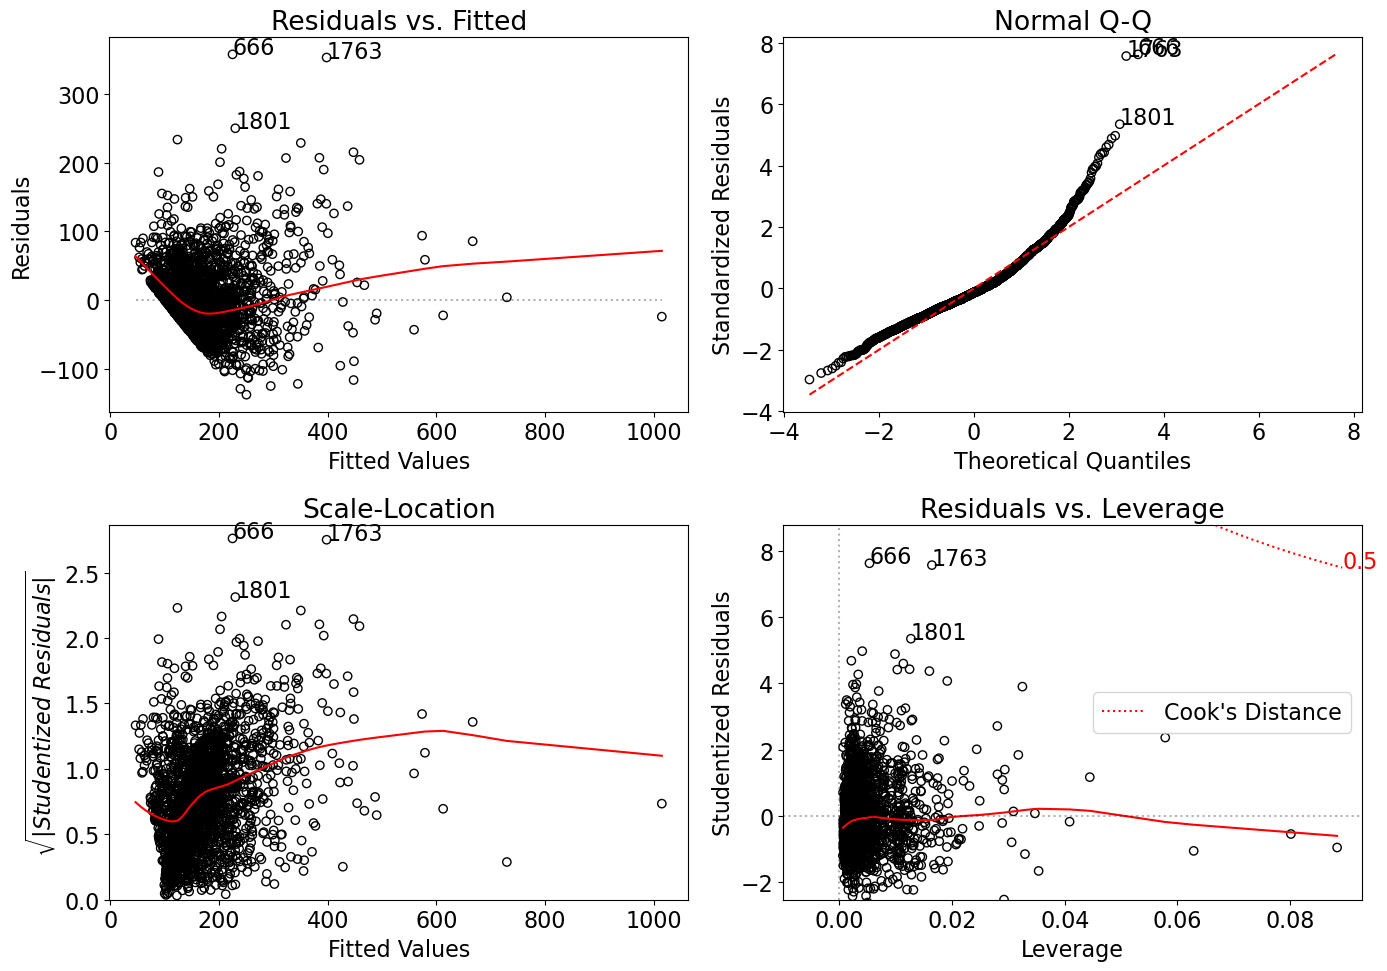

In [ ]:
residual_plots(model2_5) 

In [ ]:
coefficients=coeff("M2.5 : Influence points removed",model2_5.params)
coefficients

M1: Model with all Columns  \
const                                                  22.222330   
NoOfChildren                                            5.910939   
MinAgeOfChild                                           4.239925   
MaxAgeOfChild                                          -1.710272   
Tenure                                                 -0.011760   
FrquncyOfPurchase                                      11.151762   
NoOfUnitsPurchased                                      9.132840   
FrequencyOFPlay                                         0.002267   
NoOfGamesPlayed                                        -0.023847   
NoOfGamesBought                                       -11.947035   
City_2                                                 11.092928   
FavoriteChannelOfTransaction_Uniform                  -15.551181   
FavoriteGame_Uniform                                   -8.358531   

                                      M2 : Multicollinearity Removed(VIF)  \
const                                                          184.198794   
NoOfChildren                                                     4.866800   
MinAgeOfChild                                                    5.595750   
MaxAgeOfChild                                                   -2.907155   
Tenure                                                           0.177130   
FrquncyOfPurchase                                                     NaN   
NoOfUnitsPurchased                                             108.281020   
FrequencyOFPlay                                                  0.002132   
NoOfGamesPlayed                                                 -0.054170   
NoOfGamesBought                                                -52.209467   
City_2                                                          -2.228026   
FavoriteChannelOfTransaction_Uniform                            -4.918857   
FavoriteGame_Uniform                                           -12.244581   

                                      M3 : Removing Non significant variables  \
const                                                              184.135273   
NoOfChildren                                                         4.861214   
MinAgeOfChild                                                        5.567378   
MaxAgeOfChild                                                       -2.904415   
Tenure                                                                    NaN   
FrquncyOfPurchase                                                         NaN   
NoOfUnitsPurchased                                                 108.294279   
FrequencyOFPlay                                                      0.002141   
NoOfGamesPlayed                                                     -0.053887   
NoOfGamesBought                                                    -52.206205   
City_2                                                              -2.201800   
FavoriteChannelOfTransaction_Uniform                                -4.923226   
FavoriteGame_Uniform                                               -12.222597   

                                      M2.5 : Influence points removed  
const                                                      184.234500  
NoOfChildren                                                 3.081130  
MinAgeOfChild                                                5.019829  
MaxAgeOfChild                                               -2.083830  
Tenure                                                            NaN  
FrquncyOfPurchase                                                 NaN  
NoOfUnitsPurchased                                         106.535287  
FrequencyOFPlay                                              0.002769  
NoOfGamesPlayed                                             -0.057443  
NoOfGamesBought                                            -51.918765  
City_2                                                      -2.068076  
Favorit

In [ ]:
#Get error metrics
scores = get_metrics(y_train,model2_5.predict(X_train),
                     y_test,model2_5.predict(X_test),
                     "Model 4",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train  MAPE_Train   MAE_Test  \
0  Model 1  31.775126  1904.950192   43.645735   19.091031  31.141938   
1  Model 2  34.728607  2314.360777   48.107804   20.742194  32.991409   
2  Model 3  34.725513  2314.388821   48.108095   20.739578  32.981389   
3  Model 4  34.277749  2201.920231   46.924623   20.710097  32.640220   

      MSE_Test  RMSE_Test  MAPE_Test       R^2  
0  1746.355475  41.789418  19.879970  0.725599  
1  1902.058327  43.612594  21.298412  0.666625  
2  1900.945871  43.599838  21.293906  0.666621  
3  1978.667512  44.482216  20.459848  0.659724

## Model 5

Regularization 

In [ ]:

X = origG.drop(['CustomerID','TotalRevenueGenerated'],axis=1) 
y = origG['TotalRevenueGenerated']
X = X.drop([973,2045,1488,2934])
y = y.drop([973,2045,1488,2934])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')

In [ ]:
X_train = X_train.drop('influence_value',axis =1)
X_test = X_test.drop('influence_value',axis =1)

### RIDGE

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.71
Ridge Regression-Test set score: 0.67


In [ ]:
scores = get_metrics(y_train,ridge.predict(X_train),
                     y_test,ridge.predict(X_test),
                     "Ridge",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train  MAPE_Train   MAE_Test  \
0  Model 1  31.775126  1904.950192   43.645735   19.091031  31.141938   
1  Model 2  34.728607  2314.360777   48.107804   20.742194  32.991409   
2  Model 3  34.725513  2314.388821   48.108095   20.739578  32.981389   
3  Model 4  34.277749  2201.920231   46.924623   20.710097  32.640220   
4    Ridge  31.097680  1799.672921   42.422552   18.853229  31.041927   

      MSE_Test  RMSE_Test  MAPE_Test       R^2  
0  1746.355475  41.789418  19.879970  0.725599  
1  1902.058327  43.612594  21.298412  0.666625  
2  1900.945871  43.599838  21.293906  0.666621  
3  1978.667512  44.482216  20.459848  0.659724  
4  1903.119641  43.624759  18.833998  0.711449

### LASSO

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features: {sum(lasso.coef_ != 0)}")

Lasso Regression-Training set score: 0.71
Lasso Regression-Test set score: 0.67
Number of features: 9


In [ ]:
scores = get_metrics(y_train,lasso.predict(X_train),
                     y_test,lasso.predict(X_test),
                     "Lasso",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train  MAPE_Train   MAE_Test  \
0  Model 1  31.775126  1904.950192   43.645735   19.091031  31.141938   
1  Model 2  34.728607  2314.360777   48.107804   20.742194  32.991409   
2  Model 3  34.725513  2314.388821   48.108095   20.739578  32.981389   
3  Model 4  34.277749  2201.920231   46.924623   20.710097  32.640220   
4    Ridge  31.097680  1799.672921   42.422552   18.853229  31.041927   
5    Lasso  31.414177  1824.690142   42.716392   19.043967  31.351862   

      MSE_Test  RMSE_Test  MAPE_Test       R^2  
0  1746.355475  41.789418  19.879970  0.725599  
1  1902.058327  43.612594  21.298412  0.666625  
2  1900.945871  43.599838  21.293906  0.666621  
3  1978.667512  44.482216  20.459848  0.659724  
4  1903.119641  43.624759  18.833998  0.711449  
5  1930.507963  43.937546  19.004226  0.707438

In [ ]:
# Underfitting Lasso with low alpha value 
lassou = Lasso(alpha=0.01).fit(X_train, y_train)
print("Lasso Regression-Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso Regression-Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print(f"Number of features: {sum(lasso.coef_ != 0)}")

Lasso Regression-Training set score: 0.71
Lasso Regression-Test set score: 0.67
Number of features: 9


In [ ]:
scores = get_metrics(y_train,lassou.predict(X_train),
                     y_test,lassou.predict(X_test),
                     "Lasso Underfit",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train  MAPE_Train   MAE_Test  \
0         Model 1  31.775126  1904.950192   43.645735   19.091031  31.141938   
1         Model 2  34.728607  2314.360777   48.107804   20.742194  32.991409   
2         Model 3  34.725513  2314.388821   48.108095   20.739578  32.981389   
3         Model 4  34.277749  2201.920231   46.924623   20.710097  32.640220   
4           Ridge  31.097680  1799.672921   42.422552   18.853229  31.041927   
5           Lasso  31.414177  1824.690142   42.716392   19.043967  31.351862   
6  Lasso Underfit  31.098288  1799.677568   42.422607   18.853364  31.044781   

      MSE_Test  RMSE_Test  MAPE_Test       R^2  
0  1746.355475  41.789418  19.879970  0.725599  
1  1902.058327  43.612594  21.298412  0.666625  
2  1900.945871  43.599838  21.293906  0.666621  
3  1978.667512  44.482216  20.459848  0.659724  
4  1903.119641  43.624759  18.833998  0.711449  
5  1930.507963  43.937546  19.004226  0.707438  
6  1903.444225  43.628480  18.835438  0.711449

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.71
Elastic Net-Test set score: 0.67


In [ ]:
scores = get_metrics(y_train,elastic_net.predict(X_train),
                     y_test,elastic_net.predict(X_test),
                     "Elastic Net",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train  MAPE_Train   MAE_Test  \
0         Model 1  31.775126  1904.950192   43.645735   19.091031  31.141938   
1         Model 2  34.728607  2314.360777   48.107804   20.742194  32.991409   
2         Model 3  34.725513  2314.388821   48.108095   20.739578  32.981389   
3         Model 4  34.277749  2201.920231   46.924623   20.710097  32.640220   
4           Ridge  31.097680  1799.672921   42.422552   18.853229  31.041927   
5           Lasso  31.414177  1824.690142   42.716392   19.043967  31.351862   
6  Lasso Underfit  31.098288  1799.677568   42.422607   18.853364  31.044781   
7     Elastic Net  31.112675  1800.008728   42.426510   18.859898  31.053993   

      MSE_Test  RMSE_Test  MAPE_Test       R^2  
0  1746.355475  41.789418  19.879970  0.725599  
1  1902.058327  43.612594  21.298412  0.666625  
2  1900.945871  43.599838  21.293906  0.666621  
3  1978.667512  44.482216  20.459848  0.659724  
4  1903.119641  43.624759  18.833998  0.711449  
5  1930.507963  43.937546  19.004226  0.707438  
6  1903.444225  43.628480  18.835438  0.711449  
7  1902.761325  43.620653  18.839730  0.711395

## From the Final table we can conclude that the LASSO Underfit Model has comparitively good RMSE_Test and R^2 Value .. hence we would chose the Lasso model as it handles multicolleniarity very easily 